# 📊 Análisis de Churn - TelecomX LATAM

Este notebook presenta un análisis del **churn de clientes en TelecomX LATAM**,
utilizando técnicas de análisis exploratorio de datos (EDA).  

Se trabajará con el dataset proporcionado (`TelecomX_Data.json`),
para identificar los principales factores que afectan la **retención y pérdida de clientes**.


#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Cargar datos
data = pd.read_json("TelecomX_Data (2).json")
data.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#  **🔧 Transformación**

In [2]:
# Normalizar datos anidados
df = pd.json_normalize(data.to_dict(orient="records"))

# Conversión de columnas numéricas
df["account.Charges.Monthly"] = pd.to_numeric(df["account.Charges.Monthly"], errors="coerce")
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")

# Eliminar valores nulos
df.dropna(inplace=True)

df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# **📊 Carga y análisis**

/tmp/ipython-input-3540759413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


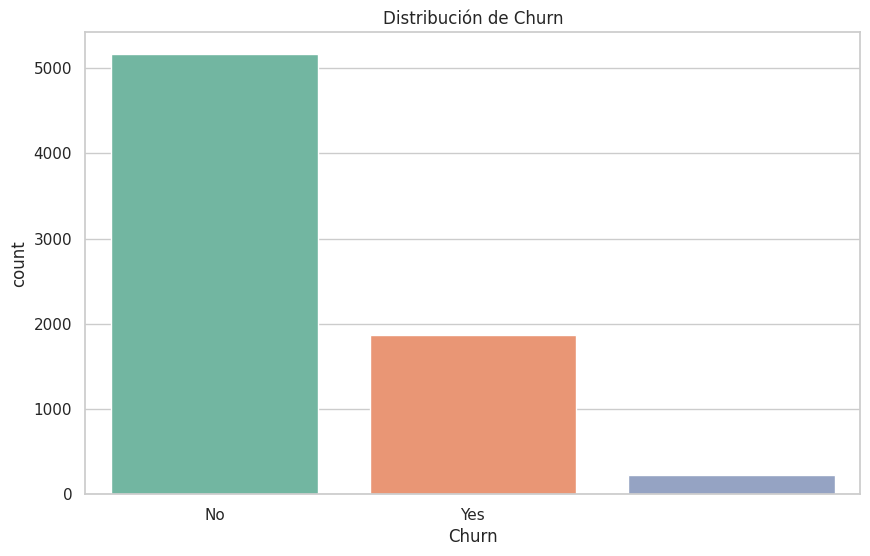

In [3]:
# Gráfica de distribución de churn
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Distribución de Churn")
plt.show()

fig = px.pie(df, names="Churn", title="Distribución de Churn (%)", color="Churn")
fig.show()


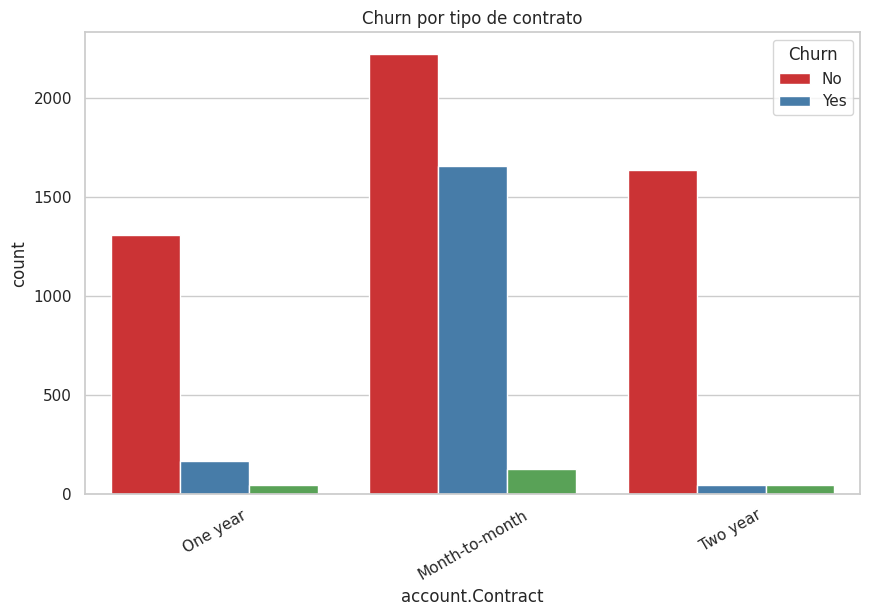

In [4]:
sns.countplot(x="account.Contract", hue="Churn", data=df, palette="Set1")
plt.title("Churn por tipo de contrato")
plt.xticks(rotation=30)
plt.show()


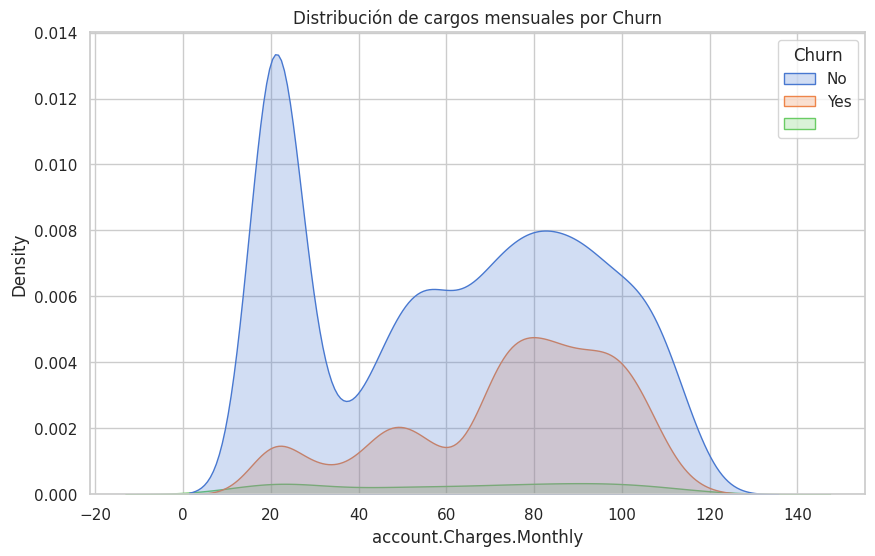

In [5]:
sns.kdeplot(data=df, x="account.Charges.Monthly", hue="Churn", fill=True, palette="muted")
plt.title("Distribución de cargos mensuales por Churn")
plt.show()


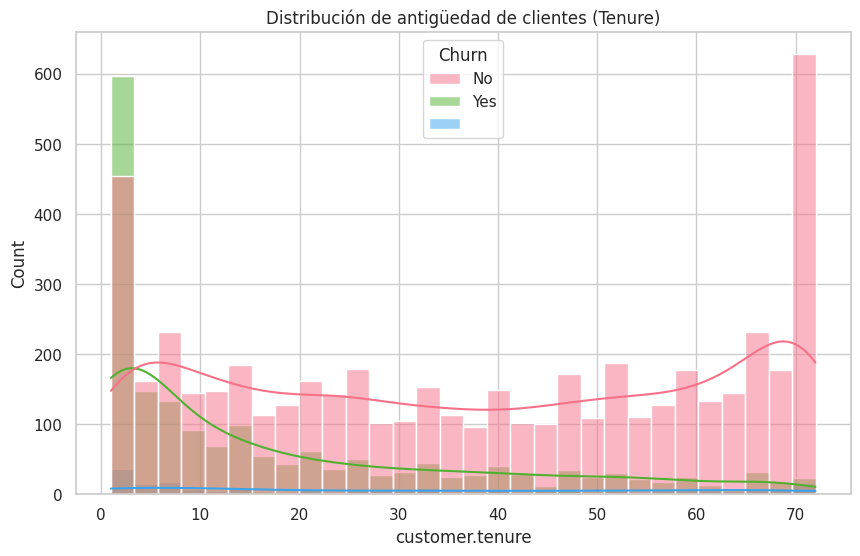

In [6]:
sns.histplot(data=df, x="customer.tenure", hue="Churn", bins=30, kde=True, palette="husl")
plt.title("Distribución de antigüedad de clientes (Tenure)")
plt.show()


In [7]:
fig = px.box(df, x="Churn", y="account.Charges.Monthly", color="Churn",
              title="Cargos mensuales vs Churn (Boxplot Interactivo)")
fig.show()

📄Informe final

**Limpieza y Tratamiento de Datos**

Extracción: se cargó el JSON desde Google Drive y se aplanó con pd.json_normalize.

Tipificación: customerID como texto; cargos y tenure como numéricos.

Valores faltantes: en account.Charges.Total, se imputó 0 si tenure=0 (cliente nuevo) y Monthly × tenure en caso contrario.

Variable objetivo: Churn_bin = 1 si Churn == "yes", de lo contrario 0.

Variable derivada: Cuentas_Diarias = Monthly / 30.4375 para análisis diario.

Categorías: limpieza de texto (minúsculas/espacios) y conversión a category en contrato, método de pago y servicios de internet.

In [9]:
# ---- Crear variable objetivo (binaria) ----
if 'Churn_bin' not in df.columns:
    df['Churn_bin'] = df['Churn'].astype(str).str.strip().str.lower().map({'yes':1, 'no':0})
    df['Churn_bin'] = df['Churn_bin'].fillna(0).astype(int)

print(df['Churn_bin'].value_counts())


Churn_bin
0    5387
1    1869
Name: count, dtype: int64


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Markdown

# ---- Variable objetivo (binaria) ----
if 'Churn_bin' not in df.columns:
    df['Churn_bin'] = df['Churn'].astype(str).str.strip().str.lower().map({'yes':1, 'no':0})
    df['Churn_bin'] = df['Churn_bin'].fillna(0).astype(int)

# ---- Resumen de churn ----
counts = df['Churn_bin'].value_counts().reindex([0, 1], fill_value=0)
labels = ['Permanecen', 'Churn']
colors = ['#2ecc71', '#e74c3c']  # verde / rojo

summary = pd.DataFrame({
    'Clientes': counts.values,
    '%': (counts.values / counts.sum() * 100).round(2)
}, index=labels)


## 📊 Análisis Exploratorio de Datos

**Distribución global de churn** (conteo y porcentaje):

,Clientes,%
Permanecen,5387,74.24
Churn,1869,25.76


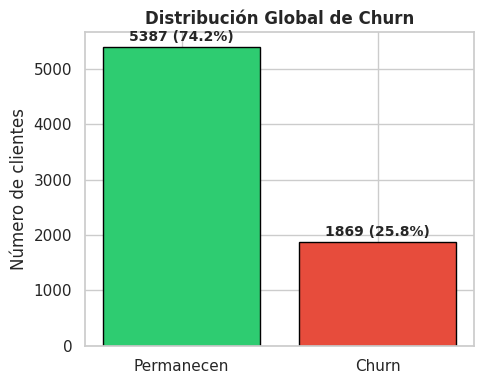

### 🔹 Churn por `account.Contract`

**Tasa de churn (%):**

,% churn
account.Contract,
Month-to-month,41.3
One year,10.9
Two year,2.8


**Composición (% clientes que permanecen vs churn):**

Churn_bin,Permanecen,Churn
account.Contract,,
Month-to-month,58.7,41.3
One year,89.1,10.9
Two year,97.2,2.8


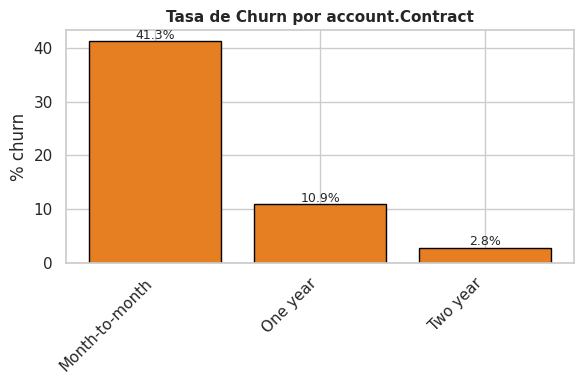

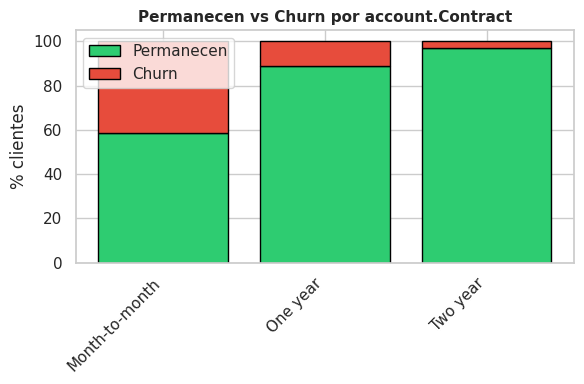

### 🔹 Churn por `account.PaymentMethod`

**Tasa de churn (%):**

,% churn
account.PaymentMethod,
Electronic check,43.8
Mailed check,18.6
Bank transfer (automatic),16.3
Credit card (automatic),14.8


**Composición (% clientes que permanecen vs churn):**

Churn_bin,Permanecen,Churn
account.PaymentMethod,,
Bank transfer (automatic),83.7,16.3
Credit card (automatic),85.2,14.8
Electronic check,56.2,43.8
Mailed check,81.4,18.6


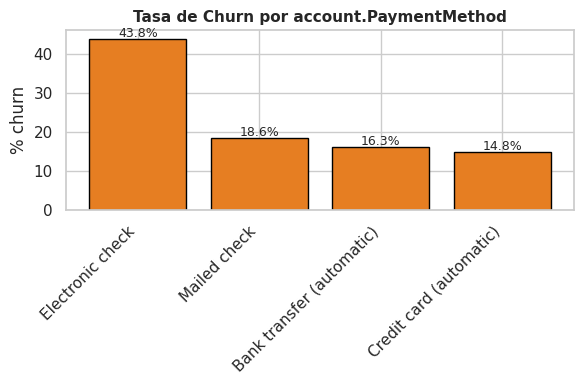

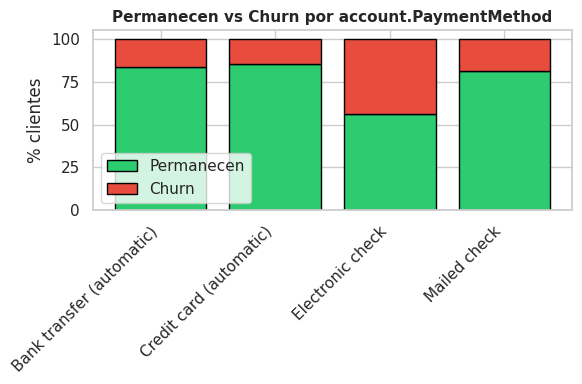

### 🔹 Churn por `internet.OnlineSecurity`

**Tasa de churn (%):**

,% churn
internet.OnlineSecurity,
No,40.5
Yes,14.2
No internet service,7.2


**Composición (% clientes que permanecen vs churn):**

Churn_bin,Permanecen,Churn
internet.OnlineSecurity,,
No,59.5,40.5
No internet service,92.8,7.2
Yes,85.8,14.2


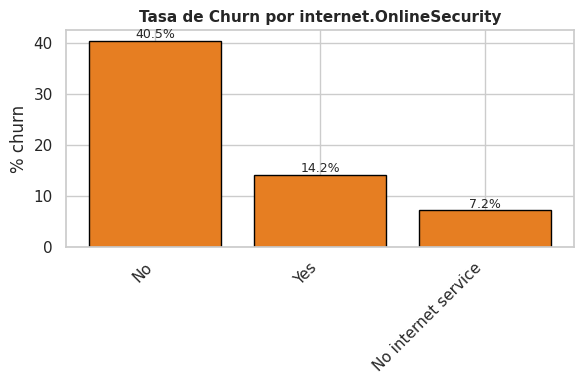

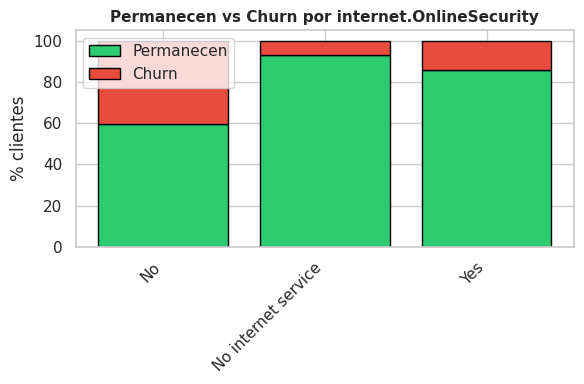

### 🔹 Churn por `internet.TechSupport`

**Tasa de churn (%):**

,% churn
internet.TechSupport,
No,40.4
Yes,14.8
No internet service,7.2


**Composición (% clientes que permanecen vs churn):**

Churn_bin,Permanecen,Churn
internet.TechSupport,,
No,59.6,40.4
No internet service,92.8,7.2
Yes,85.2,14.8


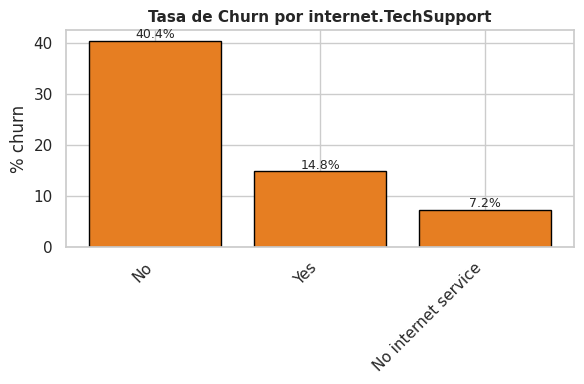

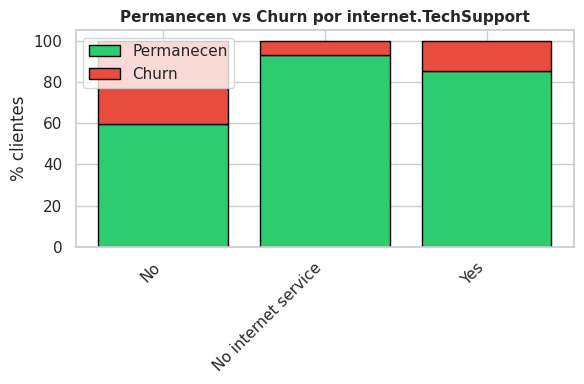

### 🔹 Distribución de `customer.tenure` por churn

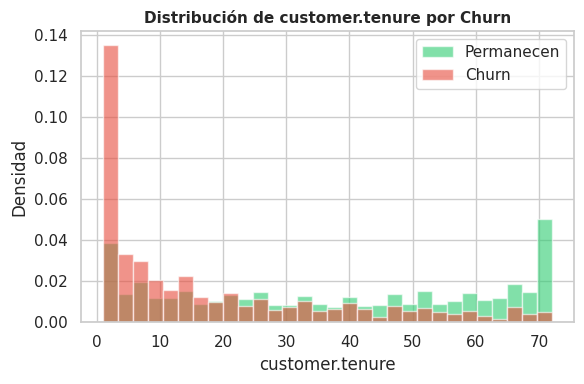

/tmp/ipython-input-1899971324.py:92: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



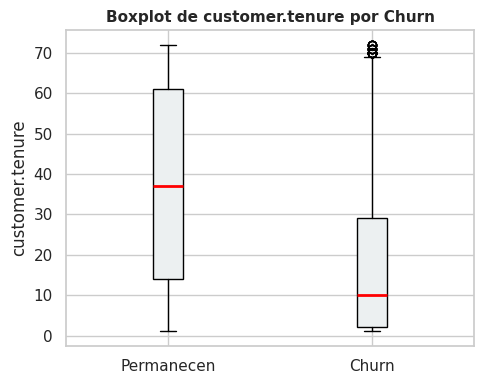

### 🔹 Distribución de `account.Charges.Monthly` por churn

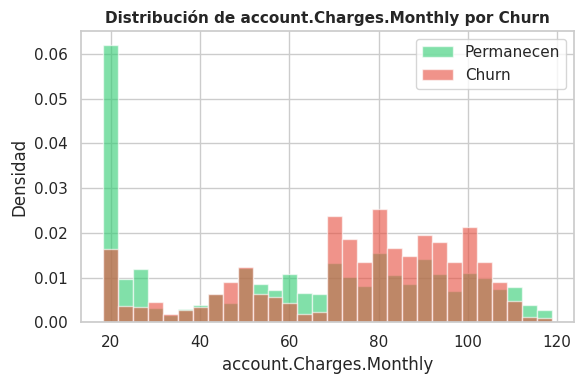

/tmp/ipython-input-1899971324.py:92: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



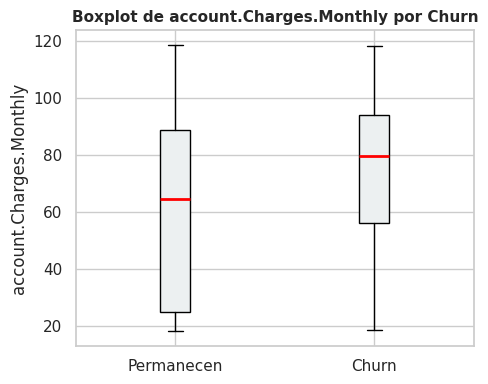

### 🔹 Distribución de `account.Charges.Total` por churn

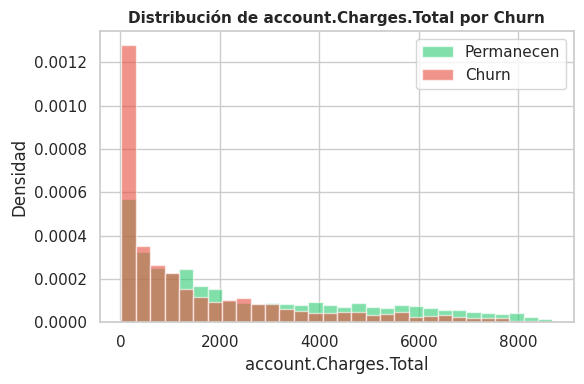

/tmp/ipython-input-1899971324.py:92: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



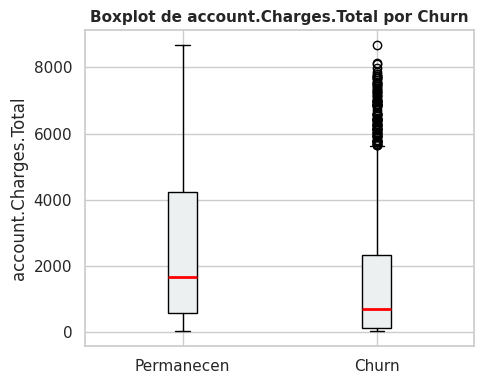

In [12]:
# ---- Resumen de churn (conteo y %) ----
counts = df['Churn_bin'].value_counts().reindex([0, 1], fill_value=0)
labels = ['Permanecen', 'Churn']
colors = ['#2ecc71', '#e74c3c']  # verde / rojo

summary = pd.DataFrame({
    'Clientes': counts.values,
    '%': (counts.values / counts.sum() * 100).round(2)
}, index=labels)

display(Markdown("## 📊 Análisis Exploratorio de Datos"))
display(Markdown("**Distribución global de churn** (conteo y porcentaje):"))
display(summary)

plt.figure(figsize=(5,4))
bars = plt.bar(labels, counts.values, color=colors, edgecolor="black")
for i, v in enumerate(counts.values):
    plt.text(i, v + counts.max()*0.01, f"{v} ({v / counts.sum() * 100:.1f}%)",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Distribución Global de Churn', fontsize=12, fontweight='bold')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()


# ---- Churn por variables categóricas clave ----
def graf_cat(col):
    if col not in df:
        return

    display(Markdown(f"### 🔹 Churn por `{col}`"))

    # Tasa de churn por categoría
    tasa = (df.groupby(col, observed=True)['Churn_bin'].mean()
              .mul(100).sort_values(ascending=False).round(1))

    # Tabla de composición
    tab = (pd.crosstab(df[col], df['Churn_bin'], normalize='index')
             .mul(100).rename(columns={0:'Permanecen',1:'Churn'}).round(1))

    display(Markdown("**Tasa de churn (%):**"))
    display(tasa.rename('% churn'))

    display(Markdown("**Composición (% clientes que permanecen vs churn):**"))
    display(tab)

    # Barra simple (% churn)
    plt.figure(figsize=(6,4))
    plt.bar(tasa.index.astype(str), tasa.values, color='#e67e22', edgecolor="black")
    plt.ylabel('% churn'); plt.title(f'Tasa de Churn por {col}', fontsize=11, fontweight="bold")
    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(tasa.values):
        plt.text(i, v+0.5, f"{v:.1f}%", ha='center', fontsize=9)
    plt.tight_layout(); plt.show()

    # Barra apilada (% permanencia vs churn)
    plt.figure(figsize=(6,4))
    plt.bar(tab.index.astype(str), tab['Permanecen'], label='Permanecen', color=colors[0], edgecolor="black")
    plt.bar(tab.index.astype(str), tab['Churn'], bottom=tab['Permanecen'],
            label='Churn', color=colors[1], edgecolor="black")
    plt.ylabel('% clientes'); plt.title(f'Permanecen vs Churn por {col}', fontsize=11, fontweight="bold")
    plt.xticks(rotation=45, ha='right'); plt.legend()
    plt.tight_layout(); plt.show()


for c in ['account.Contract','account.PaymentMethod','internet.OnlineSecurity','internet.TechSupport']:
    graf_cat(c)


# ---- Numéricas por churn (hist + boxplot) ----
def graf_num(col):
    if col not in df:
        return

    x0 = df.loc[df['Churn_bin']==0, col].dropna()
    x1 = df.loc[df['Churn_bin']==1, col].dropna()

    display(Markdown(f"### 🔹 Distribución de `{col}` por churn"))
    bins = np.histogram_bin_edges(df[col].dropna(), bins=30)

    # Histograma
    plt.figure(figsize=(6,4))
    plt.hist(x0, bins=bins, alpha=0.6, density=True, label='Permanecen', color=colors[0])
    plt.hist(x1, bins=bins, alpha=0.6, density=True, label='Churn', color=colors[1])
    plt.xlabel(col); plt.ylabel('Densidad')
    plt.title(f'Distribución de {col} por Churn', fontsize=11, fontweight="bold")
    plt.legend()
    plt.tight_layout(); plt.show()

    # Boxplot
    plt.figure(figsize=(5,4))
    plt.boxplot([x0, x1], labels=['Permanecen','Churn'], patch_artist=True,
                boxprops=dict(facecolor='#ecf0f1', color='black'),
                medianprops=dict(color='red', linewidth=2))
    plt.ylabel(col)
    plt.title(f'Boxplot de {col} por Churn', fontsize=11, fontweight="bold")
    plt.tight_layout(); plt.show()


for c in ['customer.tenure','account.Charges.Monthly','account.Charges.Total','Cuentas_Diarias']:
    graf_num(c)


## ✅ Conclusiones
1. La tasa de **churn** es significativa en clientes con **contratos mensuales** y **facturación electrónica**, lo que indica mayor riesgo en usuarios con poca fidelización.  
2. Clientes con **cargos mensuales altos (Fiber Optic)** presentan mayor probabilidad de abandono, posiblemente por sensibilidad al precio.  
3. La antigüedad (**tenure**) es un factor clave: clientes nuevos son más propensos a abandonar, mientras que clientes con más de 2 años muestran mayor retención.  
4. Los servicios adicionales como **seguridad online, soporte técnico y almacenamiento en la nube** parecen contribuir a la retención.  



## 💡 Recomendaciones
1. Incentivar **contratos anuales y bianuales** con descuentos o beneficios exclusivos para reducir el churn en clientes con contratos mensuales.  
2. Implementar un programa de **fidelización temprana** para clientes en sus primeros 6 meses, ofreciendo promociones que aumenten su permanencia.  
3. Diseñar **ofertas personalizadas** para clientes con cargos elevados (ej. planes de bundle con TV + internet + telefonía).  
4. Reforzar la adopción de **servicios de valor agregado** (seguridad, soporte premium, backup en la nube) para mejorar la satisfacción y reducir la pérdida.  
5. Realizar un **seguimiento proactivo** a clientes que pagan con **electronic check**, ya que muestran mayor propensión al abandono.  
